In [3]:
import imageio
import sys
import numpy as np
import json
import os
import gzip
from skimage.measure import block_reduce
from skimage.transform import resize

In [4]:
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
def display(img, title=''):
    plt.figure()
#     plt.title(f'{title} {img.shape}')
    plt.axis('off')
    
    if img.ndim == 2:
        plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    else:
        plt.imshow(img)

In [33]:
def batch_downsample(batch):
    batch_size = len(batch)
    crop = batch[:, 9:-9, 16:-16]
    blocky = block_reduce(crop, (1,3,2,1), np.max)
    
    # Select top five rows of each frame
    partial = blocky[:, :5, :, :]
    
    # Count the number of non-zero red (in RGB) elements in top section of each frame
    nonzero = np.count_nonzero(partial[:, :, :, 0], axis=(1,2))
    scoreboard = nonzero > 48
    commander  = (~scoreboard) & (nonzero > 0)
    
    # smoother resizing method
    blurry = resize(crop, (batch_size, 64, 64, 3), mode='constant')
    
    # remove scoreboard
    blurry[scoreboard, :5] = 0
    blocky[scoreboard, :5] = 0

    return blurry, blocky

In [35]:
def batch_downsample2(batch):
    batch_size = len(batch)
    crop = batch[:, 9:-9, 16:-16]
    blocky = block_reduce(crop, (1,3,2,1), np.max)
    
    # Select top five rows of each frame
    partial = blocky[:, :5, :, :]
    
    # Count the number of non-zero red (in RGB) elements in top section of each frame
    nonzero = np.count_nonzero(partial[:, :, :, 0], axis=(1,2))
    scoreboard = nonzero > 48
    commander  = (~scoreboard) & (nonzero > 0)

    # if commander does not exist, do not process further
    if np.count_nonzero(commander) == 0:
        return None
    
    # smoother resizing method
    blurry = resize(crop, (batch_size, 64, 64, 3), mode='constant')
    
    # remove scoreboard
    blurry[scoreboard, :5] = 0
    
    # whiten bullets
    blurry[blocky[:,:,:,0] == 142] = 1.0
    
    # whiten commandership
    blurry[commander, :5] = np.where(blocky[commander, :5] > 0, 1.0, 0.0)
    
    return blurry

In [36]:
samples = np.load('data/raw_food/1000626761.npz')

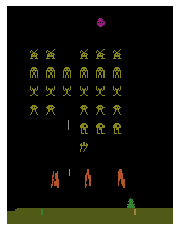

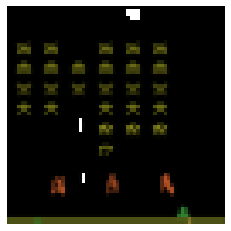

In [37]:
b1 = batch_downsample2(samples['obs'])
# 1st Image: 720, 2nd: 500
idx = 720
display(samples['obs'][idx])
display(b1[idx])

In [31]:
b1, b2 = batch_downsample(samples['obs'])

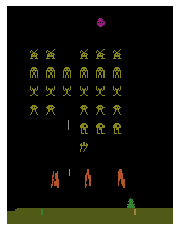

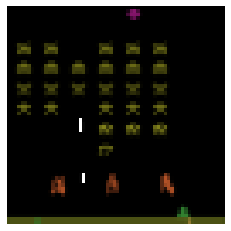

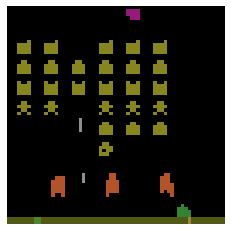

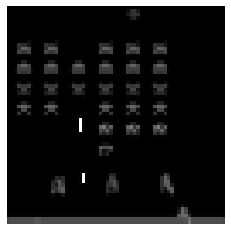

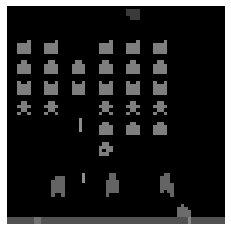

In [32]:
# 1st Image: 720, 2nd: 500
idx = 720
display(samples['obs'][idx])
display(b1[idx])
display(b2[idx])

from skimage.color import rgb2gray
g1 = np.uint8(rgb2gray(b1[idx]) * 255)
display(g1)
g2 = np.uint8(rgb2gray(b2[idx]) * 255)
display(g2)

In [20]:

def preprocess(root, dest):
    count = 0
    for filename in os.listdir(root):
        if not filename.endswith('.npz'):
            continue
        
        obs = np.load(root + filename)['obs']
            
        blurry, blocky = batch_downsample(obs)
        np.savez_compressed(dest + filename, blurry=blurry, blocky=blocky)
        
        print(f'Saved {filename}')
        count += 1
        if count >= 1000:
            break

In [21]:
preprocess('data/raw_food/', 'data/demo/')

Saved 1000306916.npz
Saved 100044630.npz
Saved 1000596655.npz
Saved 1000626761.npz
Saved 1000999040.npz
Saved 1001053853.npz
Saved 1001336297.npz
Saved 1001470791.npz
Saved 1001829789.npz
Saved 1001980164.npz
Saved 100215569.npz
Saved 1002231553.npz
Saved 1002437873.npz
Saved 1002581730.npz
Saved 1002596297.npz
Saved 1002649772.npz
Saved 1002667418.npz
Saved 1002776075.npz
Saved 1003372240.npz
Saved 1003847475.npz
Saved 1004780158.npz
Saved 1005130918.npz
Saved 100516592.npz
Saved 1005183729.npz
Saved 1005200807.npz
Saved 1006088471.npz
Saved 1006547279.npz
Saved 1006710316.npz
Saved 1006745404.npz
Saved 1007142232.npz
Saved 1007332281.npz
Saved 1007628743.npz
Saved 1007886505.npz
Saved 1008200306.npz
Saved 1008223814.npz
Saved 1008254762.npz
Saved 1008911042.npz
Saved 1008919310.npz
Saved 1009034275.npz
Saved 1009051873.npz
Saved 1009576355.npz
Saved 100971586.npz
Saved 1009730682.npz
Saved 1009733236.npz
Saved 1009819432.npz
Saved 1009882064.npz
Saved 1009987385.npz
Saved 1010089148.

Saved 1071425720.npz
Saved 1071426360.npz
Saved 1071559622.npz
Saved 1071589473.npz
Saved 1071604637.npz
Saved 107176374.npz
Saved 1071957710.npz
Saved 1071974931.npz
Saved 1072052858.npz
Saved 1072264674.npz
Saved 1072574591.npz
Saved 1072695230.npz
Saved 1072703825.npz
Saved 1072749141.npz
Saved 1073901296.npz
Saved 1073975537.npz
Saved 1073976251.npz
Saved 1074119792.npz
Saved 1074811300.npz
Saved 1074935168.npz
Saved 107501956.npz
Saved 1075088022.npz
Saved 1075189830.npz
Saved 1075360515.npz
Saved 1076113963.npz
Saved 1076309120.npz
Saved 1076755141.npz
Saved 1076830686.npz
Saved 1076837032.npz
Saved 107695024.npz
Saved 1077261381.npz
Saved 1077532639.npz
Saved 1077854050.npz
Saved 1077879081.npz
Saved 107800419.npz
Saved 1078314383.npz
Saved 1078399863.npz
Saved 107854836.npz
Saved 1078704350.npz
Saved 1079080852.npz
Saved 1079482524.npz
Saved 1079495745.npz
Saved 1079753087.npz
Saved 1079780648.npz
Saved 1079849702.npz
Saved 1079958715.npz
Saved 1080070064.npz
Saved 1080075521.n

Saved 1142137162.npz
Saved 1142292937.npz
Saved 1142384042.npz
Saved 1142501432.npz
Saved 1142525264.npz
Saved 114277609.npz
Saved 1142786920.npz
Saved 1142816740.npz
Saved 1142916690.npz
Saved 1142940955.npz
Saved 1142997756.npz
Saved 1143176044.npz
Saved 1143518160.npz
Saved 1143848400.npz
Saved 1144426512.npz
Saved 1144771810.npz
Saved 1144959265.npz
Saved 1145140433.npz
Saved 1145310318.npz
Saved 1145542011.npz
Saved 1145592687.npz
Saved 1145674681.npz
Saved 1145901739.npz
Saved 1146003443.npz
Saved 1146071778.npz
Saved 11461529.npz
Saved 1146200541.npz
Saved 1146249239.npz
Saved 1146341540.npz
Saved 1146406947.npz
Saved 1146492987.npz
Saved 1146599461.npz
Saved 1146760415.npz
Saved 1146987030.npz
Saved 1147065208.npz
Saved 1147079455.npz
Saved 1147191917.npz
Saved 1147242010.npz
Saved 114777582.npz
Saved 1148082588.npz
Saved 1148096309.npz
Saved 114823851.npz
Saved 1148312098.npz
Saved 1148442464.npz
Saved 114867542.npz
Saved 1149136913.npz
Saved 1149228398.npz
Saved 1149299977.np